In [133]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix as CM 
from sklearn import model_selection 
from sklearn.model_selection import learning_curve 
from sklearn.metrics import precision_recall_curve 


In [240]:
%matplotlib inline
data = pd.read_csv("C:/Users/jstep/Downloads/german_credit_data/german.data", sep=" ",header=None)
col_mapping = {0:"checking_account", 
               1:"duration",
               2:"credit_history",
               3:"purpose",
               4:"credit_amt",
               5:"savings_acct",
               6:"employment",
               7:"installment_rate_percent",
               8:"gender_status",
               9:"other_debtors",
              10:"residence_since",
              11:"property",
              12:"age",
              13:"other_installment_plans",
              14:"housing",
              15:"no_existing_credits",
              16:"job",
              17:"no_people_liable",
              18:"has_telephone",
              19:"is_foreign_worker",
              20:"good_bad"}
data.columns = [col_mapping[col] for col in data.columns]
data["good_bad"] = np.where(data["good_bad"] == 2, 1, 0)
data = pd.get_dummies(data, drop_first=True)

In [241]:
holdout = data.sample(200)
data = data.drop(holdout.index)

In [318]:
from imblearn.over_sampling import SMOTE

In [320]:
predictors = [c for c in holdout.columns if c != 'good_bad']
target = 'good_bad'

In [296]:
bad_data = data[data["good_bad"] == 1]
good_data = data[data["good_bad"] == 0]
small_sample_bad_data = bad_data.sample(30)
# simulated imbalanced data
undersampled_data = pd.concat([good_data,small_sample_bad_data], axis=0)
# data_df = pd.concat([good_data,small_sample_bad_data], axis=0)

In [285]:
# undersampling the negative class
n_positive = np.sum(undersampled_data["good_bad"]==1)
resampled_df = undersampled_data[undersampled_data["good_bad"]==1].copy()
df = undersampled_data[undersampled_data["good_bad"]==0].sample(n_positive*15,replace = False)
resampled_df = resampled_df.append(df, ignore_index=True)

In [138]:
# oversampling the positive class
oversampled_positives = undersampled_data[undersampled_data["good_bad"]==1].sample(100,replace = True)
negative_data = undersampled_data[undersampled_data["good_bad"]==0].copy()

resampled_df = pd.concat([negative_data,oversampled_positives],axis=0)

,duration,credit_amt,installment_rate_percent,residence_since,age,no_existing_credits,no_people_liable,good_bad,checking_account_A12,checking_account_A13,...,property_A124,other_installment_plans_A142,other_installment_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,has_telephone_A192,is_foreign_worker_A202
0,6,1169,4,4,67,2,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,...,0,0,1,1,0,1,0,0,0,0
5,36,9055,2,4,35,1,2,0,0,0,...,1,0,1,0,1,1,0,0,1,0
6,24,2835,3,4,53,1,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
7,36,6948,2,2,35,1,1,0,1,0,...,0,0,1,0,0,0,0,1,1,0


In [ ]:
# using smote
X, y = oversample.fit_resample(X, y)

In [297]:
data_df = undersampled_data.copy()

In [298]:
data_df["good_bad"].value_counts()

0    554
1     30
Name: good_bad, dtype: int64

In [299]:
classifier_list = ["Logistic_Regression","Random_Forest","Gradient_Boosting", "KNN"]
classifier_models = {
               'Logistic_Regression': LogisticRegression(class_weight='balanced'),
               'Random_Forest': RandomForestClassifier(n_estimators=50, class_weight='balanced'),
               'Gradient_Boosting': GradientBoostingClassifier(max_depth=5),
               'K_NN': KNeighborsClassifier(n_neighbors=5, weights='distance')
}

n_runs = 10
test_size = 0.3

In [300]:
score_ls = []

signals_df = data_df[[c for c in data_df.columns if c != 'good_bad']].values
response_sr = data_df['good_bad'].values

for ic, (cl_name, Classifier) in enumerate(classifier_models.items()):
    for trial in range(n_runs):
        train_signals, test_signals, train_labels, test_labels = train_test_split(signals_df, response_sr, test_size = test_size)
        Classifier.fit(train_signals, train_labels)
        pred_labels = Classifier.predict(test_signals)
        precision = precision_score(test_labels, pred_labels, average='binary')
        score_ls.append([cl_name, precision, 'Precision'])
        recall = recall_score(test_labels, pred_labels, average='binary')
        score_ls.append([cl_name, recall,'Recall'])
        F1 = f1_score(test_labels, pred_labels, average='binary')
        score_ls.append([cl_name, F1,'f1 Score'])

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

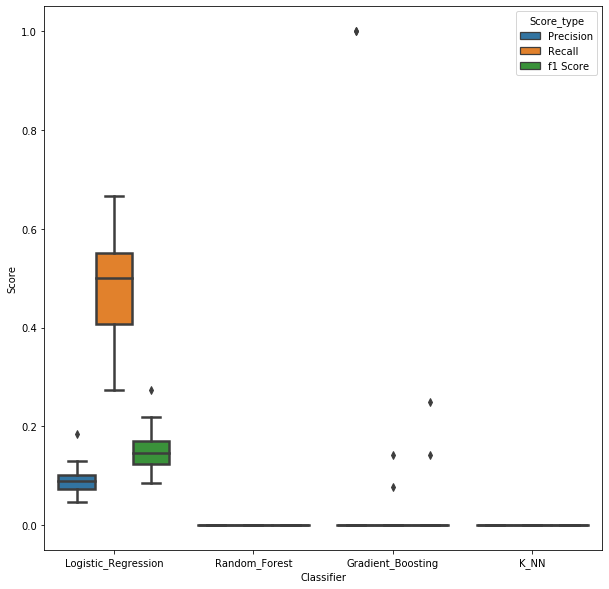

In [301]:
metrics_df = pd.DataFrame(score_ls, columns=['Classifier','Score','Score_type']) #building a dataframe with various metrics
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="Classifier", y="Score", hue="Score_type", data=metrics_df, linewidth=2.5)

In [252]:
# choose random forest
Classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced')
train_signals, test_signals, train_labels, test_labels = train_test_split(signals_df, response_sr, test_size = test_size)
Classifier.fit(train_signals, train_labels)
predictions = Classifier.predict_proba(test_signals)[:,1]  

precision_ls, recall_ls, thresholds_ls = precision_recall_curve(test_labels, predictions)
thresholds_ls = np.append(thresholds_ls, 1)
review_rate_ls = [] #Initialize the queue rate as an empty list
for threshold in thresholds_ls:  
    review_rate_ls.append((predictions >= threshold).mean())
    
plt.figure(figsize=(10,10))
plt.plot(thresholds_ls, precision_ls)
plt.plot(thresholds_ls, recall_ls)
plt.plot(thresholds_ls, review_rate_ls)
Legend = plt.legend(('precision', 'recall', 'review rate'), frameon=True, loc='best') 
Legend.get_frame().set_edgecolor('k')  
plt.xlabel('Threshold')  
plt.ylabel('Proportion') 

In [324]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(signals_df, response_sr)

In [327]:
signals_df.shape,len(response_sr), sum(response_sr)

((584, 48), 584, 30)

In [328]:
X.shape,len(y),sum(y)

((1108, 48), 1108, 554)

In [341]:
# build xgboost
from xgboost import XGBClassifier

for scale in [1, 20, 200, 2000, 20000, 200000, 2000000, 20000000, 200000000, 2000000000, 20000000000]:
# for scale in [200000000, 2000000000, 20000000000]:

    xgb = XGBClassifier(learning_rate = 0.01, n_estimators=2000, 
                        max_depth=20, scale_pos_weight = scale,
                        objective = "binary:logistic")
    xgb.fit(signals_df, response_sr)
#     xgb.fit(X, y)

#     predicted_responses_test =xgb.predict(test_signals)
#     predicted_probabilities_test =xgb.predict_proba(test_signals)[:,1]
#     precision_ls, recall_ls, thresholds_ls = precision_recall_curve(test_labels,predicted_probabilities_test)
#     thresholds_ls = np.append(thresholds_ls, 1)
    
#     plt.figure(figsize=(10,10))
#     plt.plot(thresholds_ls, precision_ls)
#     plt.plot(thresholds_ls, recall_ls)
#     Legend = plt.legend(('precision', 'recall'), frameon=True, loc='best') 
#     Legend.get_frame().set_edgecolor('k')  
#     plt.xlabel('Threshold')  
#     plt.ylabel('Proportion') 
#     plt.show()

#     confusion_matrix = CM(test_labels, predicted_responses_test, np.unique(train_labels))
#     precision = precision_score(test_labels, predicted_responses_test, average='binary')
#     recall = recall_score(test_labels, predicted_responses_test, average='binary')

    val_x = holdout[[c for c in holdout.columns if c != 'good_bad']].values
    val_y = holdout['good_bad'].values
    
    val_yhat =xgb.predict(val_x)
    predictions_val = xgb.predict_proba(val_x)[:,1]  

    confusion_matrix = CM(val_y,  val_yhat, np.unique(train_labels))
    confusion_matrix_check = CM(val_y,  np.where(predictions_val>0.5,1,0), np.unique(train_labels))
    
    precision = round(precision_score(val_y, val_yhat, average='binary')*100)
    recall = round(recall_score(val_y, val_yhat, average='binary')*100)
    
    print(f"scale = {scale}")
    print(f"confusion_matrix: \n {confusion_matrix}")
    print(f"confusion_matrix_check: \n {confusion_matrix_check}")
    print(f"precision: {precision}%")
    print(f"recall: {recall}%")

Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


scale = 1
confusion_matrix: 
 [[146   0]
 [ 52   2]]
confusion_matrix_check: 
 [[146   0]
 [ 52   2]]
precision: 100%
recall: 4%


Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


scale = 20
confusion_matrix: 
 [[146   0]
 [ 48   6]]
confusion_matrix_check: 
 [[146   0]
 [ 48   6]]
precision: 100%
recall: 11%


Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


scale = 200
confusion_matrix: 
 [[137   9]
 [ 42  12]]
confusion_matrix_check: 
 [[137   9]
 [ 42  12]]
precision: 57%
recall: 22%


Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


scale = 2000
confusion_matrix: 
 [[135  11]
 [ 39  15]]
confusion_matrix_check: 
 [[135  11]
 [ 39  15]]
precision: 58%
recall: 28%


Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


scale = 20000
confusion_matrix: 
 [[131  15]
 [ 35  19]]
confusion_matrix_check: 
 [[131  15]
 [ 35  19]]
precision: 56%
recall: 35%


Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


scale = 200000
confusion_matrix: 
 [[130  16]
 [ 36  18]]
confusion_matrix_check: 
 [[130  16]
 [ 36  18]]
precision: 53%
recall: 33%


Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


scale = 2000000
confusion_matrix: 
 [[121  25]
 [ 33  21]]
confusion_matrix_check: 
 [[121  25]
 [ 33  21]]
precision: 46%
recall: 39%


Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


scale = 20000000
confusion_matrix: 
 [[121  25]
 [ 34  20]]
confusion_matrix_check: 
 [[121  25]
 [ 34  20]]
precision: 44%
recall: 37%


Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


scale = 200000000
confusion_matrix: 
 [[114  32]
 [ 29  25]]
confusion_matrix_check: 
 [[114  32]
 [ 29  25]]
precision: 44%
recall: 46%


Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


scale = 2000000000
confusion_matrix: 
 [[96 50]
 [26 28]]
confusion_matrix_check: 
 [[96 50]
 [26 28]]
precision: 36%
recall: 52%


Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


scale = 20000000000
confusion_matrix: 
 [[65 81]
 [13 41]]
confusion_matrix_check: 
 [[65 81]
 [13 41]]
precision: 34%
recall: 76%


In [314]:
XGBClassifier(learning_rate = 0.01, n_estimators=2000, max_depth=20, scale_pos_weight = scale, objective = "binary:logistic")

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=20,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=2000, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=20000000000, subsample=None, tree_method=None,
              validate_parameters=False, verbosity=None)

In [293]:
confusion_matrix = CM(test_labels, np.where(predicted_probabilities_test > 0.5,1,0), np.unique(train_labels))
confusion_matrix

Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


array([[137,   0],
       [  0,   7]], dtype=int64)

In [294]:
# trying model on hold out

val_x = holdout[[c for c in holdout.columns if c != 'good_bad']].values
val_y = holdout['good_bad'].values

In [295]:
val_yhat =xgb.predict(val_x)
predictions_val = xgb.predict_proba(val_x)[:,1]  

confusion_matrix = CM(val_y,  val_yhat, np.unique(train_labels))
print(f"confusion_matrix: \n {confusion_matrix}")

Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


confusion_matrix: 
 [[144   2]
 [ 50   4]]


In [221]:
predictions = xgb.predict_proba(val_x)[:,1]  

precision_ls, recall_ls, thresholds_ls = precision_recall_curve(val_y, predictions)

Text(0, 0.5, 'Proportion')

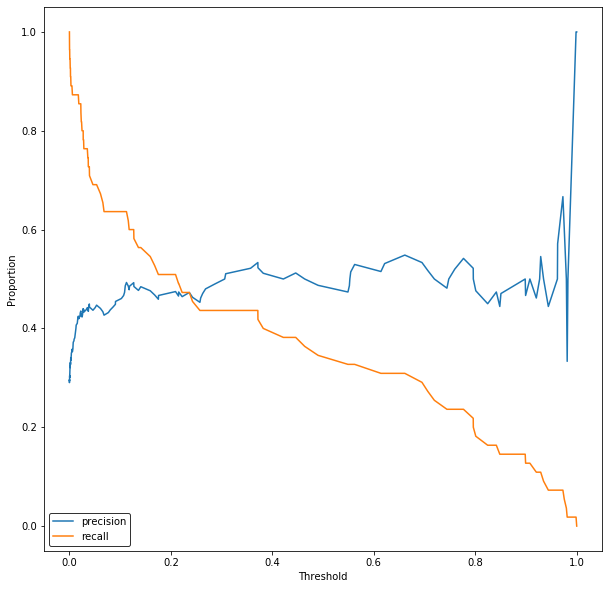

In [222]:
plt.figure(figsize=(10,10))
thresholds_ls = np.append(thresholds_ls, 1)
plt.plot(thresholds_ls, precision_ls)
plt.plot(thresholds_ls, recall_ls)
Legend = plt.legend(('precision', 'recall'), frameon=True, loc='best') 
Legend.get_frame().set_edgecolor('k')  
plt.xlabel('Threshold')  
plt.ylabel('Proportion') 

In [ ]:
# binary:logistic

In [210]:
chk = pd.DataFrame({"val_y":val_y, "val_yhat":val_yhat})
print(len(chk[(chk["val_y"] == 1) & (chk["val_yhat"] == 1)]),
len(chk[(chk["val_y"] == 0) & (chk["val_yhat"] == 0)]),
len(chk[(chk["val_y"] == 0) & (chk["val_yhat"] == 1)]),
len(chk[(chk["val_y"] == 1) & (chk["val_yhat"] == 0)]))

18 125 20 37


In [150]:
xgb.predict_proba(val_x)
# print(xgb.classes_)

array([[9.99776423e-01, 2.23584910e-04],
       [9.97127354e-01, 2.87265773e-03],
       [9.98135030e-01, 1.86495273e-03],
       [8.39074731e-01, 1.60925269e-01],
       [9.99679208e-01, 3.20774066e-04],
       [9.99940872e-01, 5.91121825e-05],
       [9.59974229e-01, 4.00257781e-02],
       [9.99866366e-01, 1.33620793e-04],
       [9.99210179e-01, 7.89830636e-04],
       [9.85010922e-01, 1.49890855e-02],
       [9.60454404e-01, 3.95455882e-02],
       [9.97419178e-01, 2.58079381e-03],
       [9.38209593e-01, 6.17904030e-02],
       [9.94651854e-01, 5.34816971e-03],
       [9.99528408e-01, 4.71585750e-04],
       [9.99574363e-01, 4.25643317e-04],
       [9.84757125e-01, 1.52428588e-02],
       [9.99777853e-01, 2.22129398e-04],
       [5.68500996e-01, 4.31499004e-01],
       [9.98157144e-01, 1.84287422e-03],
       [9.98351157e-01, 1.64883444e-03],
       [5.52545249e-01, 4.47454751e-01],
       [8.88891935e-01, 1.11108094e-01],
       [9.95936513e-01, 4.06350382e-03],
       [9.995081

In [25]:
xgb.predict(test_signals)


array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [30]:
from sklearn.model_selection import cross_val_score

xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, train_signals, train_labels, cv=10, scoring = "accuracy")

In [31]:
scores

array([0.8       , 0.71428571, 0.77142857, 0.78571429, 0.77142857,
       0.81428571, 0.78571429, 0.74285714, 0.72857143, 0.8       ])

In [12]:
# shap values
import shap

C:\Users\jstep\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jstep\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jstep\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jstep\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [13]:
explainer = shap.TreeExplainer(Classifier)

In [14]:
shap_values = explainer.shap_values(train_signals)


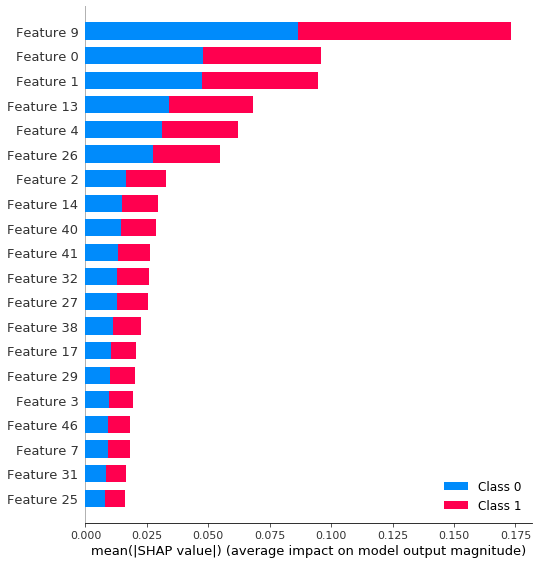

In [15]:
shap.summary_plot(shap_values, train_signals)

In [342]:
! git add .
! git commit -m "adding confusion matrices"
! git push

The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory


[master 26fe9d6] adding confusion matrices
 4 files changed, 8182 insertions(+), 434 deletions(-)
 create mode 100644 .ipynb_checkpoints/workflow imbalanced-checkpoint.ipynb
 create mode 100644 workflow imbalanced.ipynb
 rewrite workflow normal.ipynb (88%)


To https://github.com/jstephenj14/classification-model-workflow.git
   4437646..26fe9d6  master -> master
